In [15]:
import numpy as np
import matplotlib.pyplot as plt

# from matplotlib import rcParams, matplotlib_fname
# # set the font to support Chinese characters
# rcParams['font.sans-serif'] = ['SimHei']
# # set the font size
# rcParams['font.size'] = 12
# # avoid using unicode minus sign
# rcParams['axes.unicode_minus'] = False

import seaborn as sns
import os
import sys

# 获取当前文件所在的文件夹路径
if "__file__" in globals():
    # 获取__file__变量的值
    file_path = __file__
    # 获取当前文件所在的文件夹路径
    dir_now = os.path.dirname(file_path)
else:
    # 获取当前工作目录
    dir_now = os.getcwd()
sys.path.append(os.path.join(dir_now, '../../'))
sys.path.append(os.path.join(dir_now, '../'))

from NNutils import *
from amm_methods import *

## 统计数据集

In [16]:
linear_name = 'etl2'
feedback_bits = 256
linear_name_full = "ex_linear2"
method = METHOD_MITHRAL
ncodebooks = 256 # max:512
ncentroids = 32
train_sam_num = 1000 # 训练集样本数
test_sam_num = 1000


In [17]:
AMM_train_dirs = get_AMM_train_dirs(linear_name, linear_name_full, method, feedback_bits, train_sam_num, test_sam_num)
train_data = np.load(os.path.join(AMM_train_dirs["dir_train"],AMM_train_dirs["linearin_path_train"]))
test_data = np.load(os.path.join(AMM_train_dirs["dir_test"],AMM_train_dirs["linearin_path_test"]))

In [18]:
D = train_data.shape[1]
DC = int(D / ncodebooks)
n = 0
train_data_n_cb = train_data[:,n*DC:(n+1)*DC] # 取第n个codebook的数据
train_data_n_cb_col0 = train_data_n_cb[:,0] # 取第n个codebook的第0列数据
train_data_n_cb_col1 = train_data_n_cb[:,1] # 取第n个codebook的第1列数据

In [23]:
def plot_dist_remove0(data, bins, legend=""):
    data = data.flatten()

    # get the max and min values
    max_value = data.max()
    min_value = data.min()
    
    # create a boolean mask by comparing with zero
    mask = data != 0

    # count the number of zero elements
    zero_count = np.count_nonzero(~mask)

    # calculate the proportion of zeros
    zero_prop = zero_count / mask.size

    # apply the mask to filter out zero elements
    data_no0 = data[mask]

    # plot a histogram of the matrix elements with 10 bins
    plt.hist(data_no0.flatten(), bins=bins, range=(min_value, max_value), label=legend)
    plt.legend()
    title = "Distribution of non-zero numbers(original data zero proportion %.2f%%)" % (zero_prop*100)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

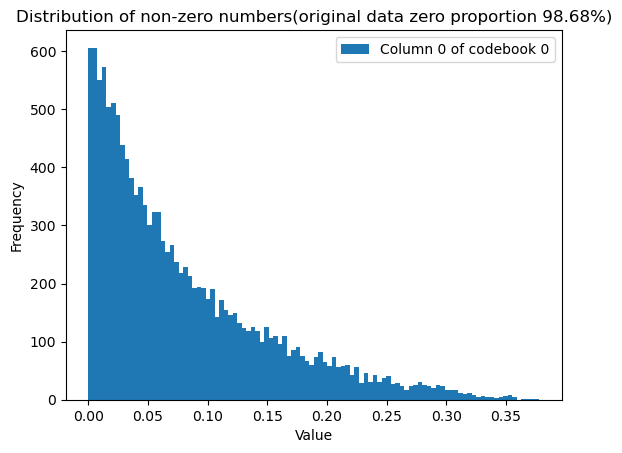

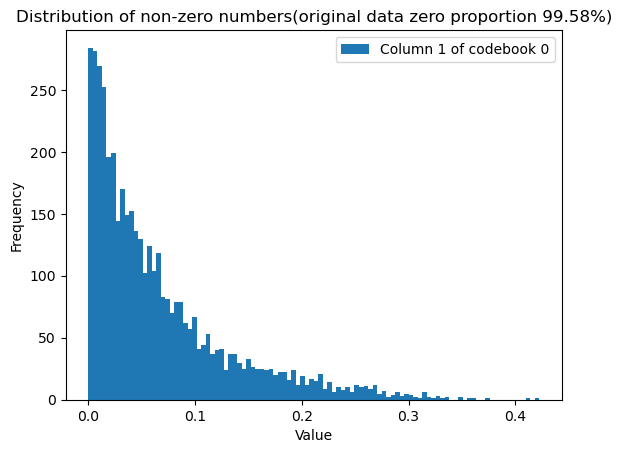

In [26]:
plot_dist_remove0(train_data_n_cb_col0, 100, "Column %d of codebook %d" % (0, n))
plot_dist_remove0(train_data_n_cb_col1, 100, "Column %d of codebook %d" % (1, n))

## 统计质心

In [28]:
centroids_b = np.load("centroids(%i, %i, %i)_b_ridge.npy" % (ncodebooks, ncentroids, D))
centroids_2_a = np.load("centroids(%i, %i, %i)-2_a_ridge.npy" % (ncodebooks, ncentroids, D))
centroids_128_a = np.load("centroids(%i, %i, %i)-128_a_ridge.npy" % (ncodebooks, ncentroids, D))
